In [1]:
import pandas as pd
import sys
import numpy as np
import geopandas as gp
import matplotlib.pyplot as plt

# Precinct Shapefile

## VEST's Documentation File

Election results from Delaware Department of Elections (https://elections.delaware.gov/archive/elect16/elect16_general/html/index.shtml)
Precinct shapefile from State of Delaware FirstMap GIS (http://opendata.firstmap.delaware.gov/datasets/delaware-election-boundaries)

Precincts 17-02, 16-31, and 16-41 are the reporting units for UOCAVA votes from New Castle, Kent, and Sussex Counties, respectively. These were distributed by candidate to precincts based on their share of the precinct-level reported vote.

- G16PREDCLI - Hillary Clinton (Democratic Party)
- G16PRERTRU - Donald J. Trump (Republican Party)
- G16PREGSTE - Jill Stein (Green Party)
- G16PRELJOH - Gary Johnson (Libertarian Party)


- G16HALDROC - Lisa Blunt Rochester (Democratic Party)
- G16HALRREI - Hans Reigle (Republican Party)
- G16HALGPER - Mark J. Perri (Green Party)
- G16HALLGES - Scott A. Gesty (Libertarian Party)


- G16GOVDCAR - John Carney (Democratic Party)
- G16GOVRBON - Colin Bonini (Republican Party)
- G16GOVGGRO - Andrew Groff (Green Party)
- G16GOVLGOW - Sean Louis Goward (Libertarian Party)


- G16LTGDHAL - Bethany Hall-Long (Democratic Party)
- G16LTGRGUN - La Mar Gunn (Republican Party)


- G16INSDNAV - Trinidad Navarro (Democratic Party)
- G16INSRCRA - Jeffrey E. Cragg (Republican Party)


## Load VEST's Final File

In [2]:
vest_shp = gp.read_file("./raw-from-source/VEST/de_2016/de_2016.shp")

In [3]:
vest_shp.shape

(430, 18)

In [4]:
vest_shp.head(1)

,PRECINCT,G16PREDCLI,G16PRERTRU,G16PREGSTE,G16PRELJOH,G16HALDROC,G16HALRREI,G16HALGPER,G16HALLGES,G16GOVDCAR,G16GOVRBON,G16GOVGGRO,G16GOVLGOW,G16LTGDHAL,G16LTGRGUN,G16INSDNAV,G16INSRCRA,geometry
0,01-21,334,257,9,24,325,262,11,13,358,248,8,8,352,251,362,242,"POLYGON ((-8424454.124 4829097.736, -8424475.4..."


<AxesSubplot:>

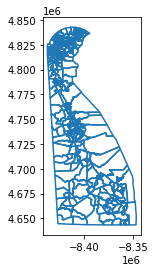

In [5]:
vest_shp.boundary.plot()

# Election Results

## Load 5 Files

The SOS directed us to this link for election results for the 2018 general: https://elections.delaware.gov/archive/elect16/elect16_general/html/index.shtml

We copy-pasted each election section to separate csv files and load them individually below. 

In [6]:
pre_results = pd.read_csv('./raw-from-source/SOS/DE Election Results - pre_g16.csv')
pre_results = pre_results[(pre_results.Office == 'PRESIDENT') & (pre_results.District.str.contains('-'))]
pre_results.head()

,Office,District,Total,G16PREDCLI_mc,G16PREDCLI_abs,G16PREDCLI,G16PRERTRU_mc,G16PRERTRU_abs,G16PRERTRU,G16PREGSTE_mc,G16PREGSTE_abs,G16PREGSTE,G16PRELJOH_mc,G16PRELJOH_abs,G16PRELJOH
2,PRESIDENT,01-01,767,636,43,679,64,4,68,8,0,8,11,1,12
3,PRESIDENT,02-01,"1,246","1,125",52,"1,177",45,0,45,16,0,16,8,0,8
4,PRESIDENT,03-01,787,734,29,763,17,2,19,4,0,4,1,0,1
5,PRESIDENT,04-01,"1,081",978,33,"1,011",44,1,45,13,0,13,12,0,12
6,PRESIDENT,05-01,"1,219",938,49,987,163,6,169,25,1,26,36,1,37


In [7]:
hal_results = pd.read_csv('./raw-from-source/SOS/DE Election Results - hal_g16.csv')
hal_results = hal_results[(hal_results.Office == 'REPRESENTATIVE IN CONGRESS') & (hal_results.District.str.contains('-'))]
hal_results.head()

,Office,District,Total,G16HALDROC_mc,G16HALDROC_abs,G16HALDROC,G16HALRREI_mc,G16HALRREI_abs,G16HALRREI,G16HALGPER_mc,G16HALGPER_abs,G16HALGPER,G16HALLGES_mc,G16HALLGES_abs,G16HALLGES
2,REPRESENTATIVE IN CONGRESS,01-01,748,619,43,662,60,4,64,12,1,13,8,1,9
3,REPRESENTATIVE IN CONGRESS,02-01,"1,170","1,059",50,"1,109",39,1,40,14,0,14,7,0,7
4,REPRESENTATIVE IN CONGRESS,03-01,751,693,26,719,16,3,19,8,0,8,5,0,5
5,REPRESENTATIVE IN CONGRESS,04-01,"1,005",921,31,952,34,2,36,11,0,11,6,0,6
6,REPRESENTATIVE IN CONGRESS,05-01,"1,155",885,46,931,171,6,177,34,2,36,10,1,11


In [8]:
gov_results = pd.read_csv('./raw-from-source/SOS/DE Election Results - gov_g16.csv')
gov_results = gov_results[(gov_results.Office == 'GOVERNOR') & (gov_results.District.str.contains('-'))]
gov_results.head()

,Office,District,Total,G16GOVDCAR_mc,G16GOVDCAR_abs,G16GOVDCAR,G16GOVRBON_mc,G16GOVRBON_abs,G16GOVRBON,G16GOVGGRO_mc,G16GOVGGRO_abs,G16GOVGGRO,G16GOVLGOW_mc,G16GOVLGOW_abs,G16GOVLGOW
2,GOVERNOR,01-01,732,608,41,649,62,3,65,11,2,13,5,0,5
3,GOVERNOR,02-01,"1,138","1,011",49,"1,060",53,1,54,16,0,16,8,0,8
4,GOVERNOR,03-01,719,655,26,681,21,3,24,8,0,8,6,0,6
5,GOVERNOR,04-01,975,884,30,914,41,1,42,10,0,10,9,0,9
6,GOVERNOR,05-01,"1,137",888,42,930,164,7,171,24,2,26,8,2,10


In [9]:
ltg_results = pd.read_csv('./raw-from-source/SOS/DE Election Results - ltg_g16.csv')
ltg_results = ltg_results[(ltg_results.Office == 'LIEUTENANT GOVERNOR') & (ltg_results.District.str.contains('-'))]
ltg_results.head()

,Office,District,Total,G16LTGDHAL_mc,G16LTGDHAL_abs,G16LTGDHAL,G16LTGRGUN_mc,G16LTGRGUN_abs,G16LTGRGUN
2,LIEUTENANT GOVERNOR,01-01,720,488,40,528,185,7,192
3,LIEUTENANT GOVERNOR,02-01,"1,101",884,46,930,169,2,171
4,LIEUTENANT GOVERNOR,03-01,728,564,24,588,136,4,140
5,LIEUTENANT GOVERNOR,04-01,962,816,28,844,116,2,118
6,LIEUTENANT GOVERNOR,05-01,"1,110",830,47,877,224,9,233


In [10]:
ins_results = pd.read_csv('./raw-from-source/SOS/DE Election Results - ins_g16.csv')
ins_results = ins_results[(ins_results.Office == 'INSURANCE COMMISSIONER') & (ins_results.District.str.contains('-'))]
ins_results.head()

,Office,District,Total,G16INSDNAV_mc,G16INSDNAV_abs,G16INSDNAV,G16INSRCRA_mc,G16INSRCRA_abs,G16INSRCRA
2,INSURANCE COMMISSIONER,01-01,717,593,43,636,80,1,81
3,INSURANCE COMMISSIONER,02-01,"1,105",997,50,"1,047",58,0,58
4,INSURANCE COMMISSIONER,03-01,726,666,25,691,31,4,35
5,INSURANCE COMMISSIONER,04-01,955,872,26,898,54,3,57
6,INSURANCE COMMISSIONER,05-01,"1,104",863,47,910,185,9,194


## Merge 5 Files

In [11]:
election_results = pre_results.merge(hal_results, how = 'outer', on = 'District').merge(gov_results, 
                                                  how = 'outer', on = 'District').merge(ltg_results, 
                                                  how = 'outer', on = 'District').merge(ins_results, 
                                                  how = 'outer', on = 'District')

In [12]:
cols = {x: 'float' for x in election_results.columns if 'G16' in x}
election_results = election_results.replace(',','', regex=True)
election_results = election_results.astype(cols)

# Validating Election Results

## Race Totals

In [13]:
vest_shp.columns

Index(['PRECINCT', 'G16PREDCLI', 'G16PRERTRU', 'G16PREGSTE', 'G16PRELJOH',
       'G16HALDROC', 'G16HALRREI', 'G16HALGPER', 'G16HALLGES', 'G16GOVDCAR',
       'G16GOVRBON', 'G16GOVGGRO', 'G16GOVLGOW', 'G16LTGDHAL', 'G16LTGRGUN',
       'G16INSDNAV', 'G16INSRCRA', 'geometry'],
      dtype='object')

In [14]:
data_columns = ['G16PREDCLI', 'G16PRERTRU', 'G16PREGSTE', 'G16PRELJOH',
       'G16HALDROC', 'G16HALRREI', 'G16HALGPER', 'G16HALLGES', 'G16GOVDCAR',
       'G16GOVRBON', 'G16GOVGGRO', 'G16GOVLGOW', 'G16LTGDHAL', 'G16LTGRGUN',
       'G16INSDNAV', 'G16INSRCRA']

print("Printing differences below")
for race in data_columns:
    if (sum(vest_shp[race])- election_results[race].sum() != 0):
        print(race+" has a difference of "+str(sum(vest_shp[race])-election_results[race].sum())+" votes")
        print("\tVEST: "+str(sum(vest_shp[race]))+" votes")
        print("\tSOURCES: "+str(election_results[race].sum())+" votes")
    else:
        print(race + " is equal", "\tVEST: " + str(sum(vest_shp[race])), "\tRDH: " + str(election_results[race].sum()))
print("")
print("All other races are equal")

Printing differences below
G16PREDCLI is equal 	VEST: 235603 	RDH: 235603.0
G16PRERTRU is equal 	VEST: 185127 	RDH: 185127.0
G16PREGSTE is equal 	VEST: 6103 	RDH: 6103.0
G16PRELJOH is equal 	VEST: 14757 	RDH: 14757.0
G16HALDROC is equal 	VEST: 233554 	RDH: 233554.0
G16HALRREI is equal 	VEST: 172301 	RDH: 172301.0
G16HALGPER is equal 	VEST: 8326 	RDH: 8326.0
G16HALLGES is equal 	VEST: 6436 	RDH: 6436.0
G16GOVDCAR is equal 	VEST: 248404 	RDH: 248404.0
G16GOVRBON is equal 	VEST: 166852 	RDH: 166852.0
G16GOVGGRO is equal 	VEST: 5951 	RDH: 5951.0
G16GOVLGOW is equal 	VEST: 4577 	RDH: 4577.0
G16LTGDHAL is equal 	VEST: 248141 	RDH: 248141.0
G16LTGRGUN is equal 	VEST: 169291 	RDH: 169291.0
G16INSDNAV is equal 	VEST: 246428 	RDH: 246428.0
G16INSRCRA is equal 	VEST: 169228 	RDH: 169228.0

All other races are equal


## County-by-County Totals

In [15]:
vest_shp.shape

(430, 18)

In [16]:
election_results.shape

(432, 59)

In [17]:
election_results.sort_values('District').head()

,Office_x,District,Total_x,G16PREDCLI_mc,G16PREDCLI_abs,G16PREDCLI,G16PRERTRU_mc,G16PRERTRU_abs,G16PRERTRU,G16PREGSTE_mc,...,G16LTGRGUN_abs,G16LTGRGUN,Office,Total,G16INSDNAV_mc,G16INSDNAV_abs,G16INSDNAV,G16INSRCRA_mc,G16INSRCRA_abs,G16INSRCRA
0,PRESIDENT,01-01,767,636.0,43.0,679.0,64.0,4.0,68.0,8.0,...,7.0,192.0,INSURANCE COMMISSIONER,717,593.0,43.0,636.0,80.0,1.0,81.0
14,PRESIDENT,01-02,1211,1131.0,41.0,1172.0,19.0,3.0,22.0,8.0,...,8.0,149.0,INSURANCE COMMISSIONER,1008,922.0,34.0,956.0,51.0,1.0,52.0
27,PRESIDENT,01-03,688,618.0,14.0,632.0,41.0,0.0,41.0,8.0,...,2.0,83.0,INSURANCE COMMISSIONER,592,524.0,13.0,537.0,55.0,0.0,55.0
37,PRESIDENT,01-04,1379,823.0,119.0,942.0,339.0,31.0,370.0,19.0,...,33.0,359.0,INSURANCE COMMISSIONER,1312,820.0,112.0,932.0,353.0,27.0,380.0
53,PRESIDENT,01-05,1408,996.0,57.0,1053.0,291.0,18.0,309.0,13.0,...,20.0,302.0,INSURANCE COMMISSIONER,1303,1028.0,51.0,1079.0,203.0,21.0,224.0


Note: New Castle is not fips code 001. The first two digits of `District` do not correspond to fips. 

In [18]:
vest_shp.sort_values('PRECINCT').head()

,PRECINCT,G16PREDCLI,G16PRERTRU,G16PREGSTE,G16PRELJOH,G16HALDROC,G16HALRREI,G16HALGPER,G16HALLGES,G16GOVDCAR,G16GOVRBON,G16GOVGGRO,G16GOVLGOW,G16LTGDHAL,G16LTGRGUN,G16INSDNAV,G16INSRCRA,geometry
5,01-01,681,68,8,12,663,64,13,9,649,65,13,5,528,192,636,81,"POLYGON ((-8407935.202 4831832.283, -8407957.0..."
6,01-02,1175,22,8,9,1008,17,18,11,995,21,10,5,870,149,956,52,"POLYGON ((-8410302.300 4827543.064, -8410298.6..."
7,01-03,633,41,9,6,547,28,12,16,539,36,19,8,482,83,537,55,"POLYGON ((-8411336.792 4828825.843, -8411346.1..."
8,01-04,944,370,19,48,926,380,15,17,1015,323,12,14,955,359,932,380,"POLYGON ((-8413287.555 4832059.508, -8413275.1..."
9,01-05,1055,309,14,32,1032,233,25,9,1037,243,20,9,994,302,1079,224,"POLYGON ((-8420436.604 4810966.168, -8420438.1..."


We will only validate the statewide totals and not continue to validate the county totals at this time, because the SOS file and the VEST file do not break out election results by county. There are only 3 counties in Delaware. 

## Precinct-by-Precinct Votes

### Distribute UOCAVA Votes

Created the following shapefile by intersecting the 2010 Census county shapefile with the Precincts shapefile linked by VEST in GQIS, to get the precinct to county translation. 

In [19]:
precinct_county = gp.read_file('./raw-from-source/Census/de_precincts_county_intersection/de_precincts_county_intersection.shp')

In [20]:
precinct_county_original = precinct_county.copy()

In [21]:
precinct_county[['EDRD_2012','COUNTY','COUNTYFP']]

,EDRD_2012,COUNTY,COUNTYFP
0,01-21,New Castle County,003
1,01-22,New Castle County,003
2,01-23,New Castle County,003
3,01-24,New Castle County,003
4,01-25,New Castle County,003
...,...,...,...
425,08-38,Sussex County,005
426,08-40,Sussex County,005
427,08-41,Sussex County,005
428,09-20,Sussex County,005


In [22]:
election_results.shape

(432, 59)

In [23]:
election_results_county = election_results.merge(precinct_county, left_on = 'District', right_on = 'EDRD_2012', how = 'outer', indicator = True)
election_results_county.groupby('_merge').count()

,Office_x,District,Total_x,G16PREDCLI_mc,G16PREDCLI_abs,G16PREDCLI,G16PRERTRU_mc,G16PRERTRU_abs,G16PRERTRU,G16PREGSTE_mc,...,POPULATION,DISTRICT,GEOID,NAME,STATE,COUNTY,TOTPOP10,STATEFP,COUNTYFP,geometry
_merge,,,,,,,,,,,,,,,,,,,,,
left_only,3,3,3,3,3,3,3,3,3,3,...,0,0,0,0,0,0,0,0,0,0
right_only,0,0,0,0,0,0,0,0,0,0,...,1,1,1,1,1,1,1,1,1,1
both,429,429,429,429,429,429,429,429,429,429,...,429,429,429,429,429,429,429,429,429,429


In [24]:
election_results_county[election_results_county['_merge'] != 'both'][['District','EDRD_2012']]

,District,EDRD_2012
26,17-02,NaN
341,16-31,NaN
431,16-41,NaN
432,NaN,13-02


These precincts are not in the online shapefile linked by VEST, but they appear in the election results file. 

In [25]:
election_results_county.loc[election_results_county["District"] == '17-02',"COUNTY"]="New Castle County"
election_results_county.loc[election_results_county["District"] == '16-31',"COUNTY"]="Kent County"
election_results_county.loc[election_results_county["District"] == '16-41',"COUNTY"]="Sussex County"

In [28]:
def allocate_absentee(df_receiving_votes,df_allocating,column_list,col_allocating):    
    original_cols = list(df_receiving_votes.columns)
    
    #Add in the "Total Votes column"
    df_receiving_votes.loc[:,"Total_Votes"]=0
    for race in column_list:
        df_receiving_votes.loc[:,"Total_Votes"]+=df_receiving_votes.loc[:,race]
    
    #Create the needed dataframes
    precinct_specific_totals = pd.DataFrame(df_receiving_votes.groupby([col_allocating]).sum())
    precinct_specific_totals.reset_index(drop=False,inplace=True)
    to_dole_out_totals = pd.DataFrame(df_allocating.groupby([col_allocating]).sum())
    to_dole_out_totals.reset_index(drop=False,inplace=True)
    
    #Print out any instances where the allocation, as written, won't work
    special_allocation_needed = []
    for index, row in precinct_specific_totals.iterrows():
        for race in column_list:
            if (row[race]==0):
                race_district = row[col_allocating]
                if race_district in to_dole_out_totals[col_allocating].unique():
                    to_allocate = int(to_dole_out_totals.loc[to_dole_out_totals[col_allocating]==race_district][race])
                    if (to_allocate != 0):
                        special_allocation_needed.append([race_district,race])
    
    #Create some new columns for each of these races to deal with the allocation
    for race in column_list:
        add_var = race+"_add"
        rem_var = race+"_rem"
        floor_var = race+"_floor"
        df_receiving_votes.loc[:,add_var]=0.0
        df_receiving_votes.loc[:,rem_var]=0.0
        df_receiving_votes.loc[:,floor_var]=0.0

    #Iterate over the rows
    #Note this function iterates over the dataframe two times so the rounded vote totals match the totals to allocate
    for index, row in df_receiving_votes.iterrows():
        if row[col_allocating] in to_dole_out_totals[col_allocating].unique():
            for race in column_list:
                add_var = race+"_add"
                rem_var = race+"_rem"
                floor_var = race+"_floor"
                #Grab the district
                county_id = row[col_allocating]
                if [county_id,race] in special_allocation_needed:
                    print([county_id,race])
                    print("Inside this")
                    #Get the denominator for the allocation - the summed "total votes" for precincts in that grouping
                    denom = precinct_specific_totals.loc[precinct_specific_totals[col_allocating]==county_id]["Total_Votes"]
                    #Get one of the numerators, how many districtwide votes to allocate
                    numer = to_dole_out_totals.loc[to_dole_out_totals[col_allocating]==county_id][race]
                    #Get the "total votes" for this particular precinct
                    val = df_receiving_votes.at[index,"Total_Votes"]
                    #Get the vote share, the precincts % of total precinct votes in the district times votes to allocate
                else:
                    #Get the denominator for the allocation (the precinct vote totals)
                    denom = precinct_specific_totals.loc[precinct_specific_totals[col_allocating]==county_id][race]
                    #Get one of the numerators, how many districtwide votes to allocate
                    numer = to_dole_out_totals.loc[to_dole_out_totals[col_allocating]==county_id][race]
                    #Get the vote totals for this race in this precinct
                    val = df_receiving_votes.at[index,race]
                    #Get the vote share, the precincts % of total precinct votes in the district times votes to allocate
                if ((float(denom)==0)):
                    vote_share = 0
                else:
                    vote_share = (float(val)/float(denom))*float(numer)
                df_receiving_votes.at[index,add_var] = vote_share
                #Take the decimal remainder of the allocation
                df_receiving_votes.at[index,rem_var] = vote_share%1
                #Take the floor of the allocation
                df_receiving_votes.at[index,floor_var] = np.floor(vote_share)

    #After the first pass through, get the sums of the races by district to assist in the rounding            
    first_allocation = pd.DataFrame(df_receiving_votes.groupby([col_allocating]).sum())

    #Now we want to iterate district by district to work on rounding
    county_list = list(to_dole_out_totals[col_allocating].unique()) 

    #Iterate over the district
    for county in county_list:
        for race in column_list:
            add_var = race+"_add"
            rem_var = race+"_rem"
            floor_var = race+"_floor"
            #County how many votes still need to be allocated (because we took the floor of all the initial allocations)
            to_go = int(np.round((int(to_dole_out_totals.loc[to_dole_out_totals[col_allocating]==county][race])-first_allocation.loc[first_allocation.index==county,floor_var])))
            #Grab the n precincts with the highest remainders and round these up, where n is the # of votes that still need to be allocated
            for index in df_receiving_votes.loc[df_receiving_votes[col_allocating]==county][rem_var].nlargest(to_go).index:
                df_receiving_votes.at[index,add_var] = np.ceil(df_receiving_votes.at[index,add_var])

    #Iterate over every race again
    for race in column_list:
        add_var = race+"_add"
        #Round every allocation down to not add fractional votes
        df_receiving_votes.loc[:,add_var]=np.floor(df_receiving_votes.loc[:,add_var])
        df_receiving_votes.loc[:,race]+=df_receiving_votes.loc[:,add_var]
        
    df_receiving_votes = df_receiving_votes[original_cols]
    
    return df_receiving_votes


In [29]:
df_receiving_votes = election_results_county[~election_results_county['District'].isin(['17-02','16-31','16-41'])]
df_allocating = election_results_county[election_results_county['District'].isin(['17-02','16-31','16-41'])]
column_list = ['G16PREDCLI', 'G16PRERTRU', 'G16PREGSTE', 'G16PRELJOH',
       'G16HALDROC', 'G16HALRREI', 'G16HALGPER', 'G16HALLGES', 'G16GOVDCAR',
       'G16GOVRBON', 'G16GOVGGRO', 'G16GOVLGOW', 'G16LTGDHAL', 'G16LTGRGUN',
       'G16INSDNAV', 'G16INSRCRA']
col_allocating = 'COUNTY'

df_allocated = allocate_absentee(df_receiving_votes,df_allocating,column_list,col_allocating)

/Users/peterhorton/opt/anaconda3/envs/geo_env/lib/python3.9/site-packages/pandas/core/indexing.py:1597: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = value
/Users/peterhorton/opt/anaconda3/envs/geo_env/lib/python3.9/site-packages/pandas/core/indexing.py:1720: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)
/Users/peterhorton/opt/anaconda3/envs/geo_env/lib/python3.9/site-packages/pandas/core/indexing.py:1676: SettingWithCopyWarning: 
A value is trying

### Check that totals are the same after allocation

In [30]:
def statewide_totals_check(partner_df,source_df,column_list):
    print("***Statewide Totals Check***")
    for race in column_list:
        if (sum(partner_df[race])- source_df[race].sum() != 0):
            print(race+" has a difference of "+str(sum(partner_df[race])-source_df[race].sum())+" votes")
            print("\tVEST: "+str(sum(partner_df[race]))+" votes")
            print("\tSOURCES: "+str(source_df[race].sum())+" votes")
        else:
            print(race + " is equal", "\tVEST / RDH: " + str(sum(partner_df[race])))

In [31]:
statewide_totals_check(vest_shp,df_allocated,column_list)

***Statewide Totals Check***
G16PREDCLI is equal 	VEST / RDH: 235603
G16PRERTRU is equal 	VEST / RDH: 185127
G16PREGSTE is equal 	VEST / RDH: 6103
G16PRELJOH is equal 	VEST / RDH: 14757
G16HALDROC is equal 	VEST / RDH: 233554
G16HALRREI is equal 	VEST / RDH: 172301
G16HALGPER is equal 	VEST / RDH: 8326
G16HALLGES is equal 	VEST / RDH: 6436
G16GOVDCAR is equal 	VEST / RDH: 248404
G16GOVRBON is equal 	VEST / RDH: 166852
G16GOVGGRO is equal 	VEST / RDH: 5951
G16GOVLGOW is equal 	VEST / RDH: 4577
G16LTGDHAL is equal 	VEST / RDH: 248141
G16LTGRGUN is equal 	VEST / RDH: 169291
G16INSDNAV is equal 	VEST / RDH: 246428
G16INSRCRA is equal 	VEST / RDH: 169228


### Join VEST and RDH

In [32]:
merge_df = vest_shp.merge(df_allocated, left_on = 'PRECINCT', right_on = 'District', how = 'outer', indicator = "final_merge")

In [33]:
merge_df.groupby('final_merge').count()

,PRECINCT,G16PREDCLI_x,G16PRERTRU_x,G16PREGSTE_x,G16PRELJOH_x,G16HALDROC_x,G16HALRREI_x,G16HALGPER_x,G16HALLGES_x,G16GOVDCAR_x,...,DISTRICT,GEOID,NAME,STATE,COUNTY,TOTPOP10,STATEFP,COUNTYFP,geometry_y,_merge
final_merge,,,,,,,,,,,,,,,,,,,,,
left_only,1,1,1,1,1,1,1,1,1,1,...,0,0,0,0,0,0,0,0,0,0
right_only,0,0,0,0,0,0,0,0,0,0,...,1,1,1,1,1,1,1,1,1,1
both,429,429,429,429,429,429,429,429,429,429,...,429,429,429,429,429,429,429,429,429,429


In [34]:
merge_df[merge_df['final_merge'] != 'both']

,PRECINCT,G16PREDCLI_x,G16PRERTRU_x,G16PREGSTE_x,G16PRELJOH_x,G16HALDROC_x,G16HALRREI_x,G16HALGPER_x,G16HALLGES_x,G16GOVDCAR_x,...,GEOID,NAME,STATE,COUNTY,TOTPOP10,STATEFP,COUNTYFP,geometry_y,_merge,final_merge
429,13-02,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None,NaN,left_only
430,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,10003,"New Castle County, Delaware",Delaware,New Castle County,538479.0,10,003,"POLYGON ((-8411754.463 4827552.762, -8411752.4...",right_only,right_only


### Validate

In [35]:
def precinct_votes_check(merged_df,column_list,vest_on_left,name_col,print_level=0):
    merged_df = merged_df.sort_values(by=[name_col],inplace=False)
    matching_rows = 0
    different_rows = 0
    diff_list=[]
    diff_values = []
    max_diff = 0
    for index,row in merged_df.iterrows():
        same = True
        for i in column_list:
            left_data = i + "_x"
            right_data = i + "_y"
            if ((row[left_data] is None) or (row[right_data] is None) or (np.isnan(row[right_data])or(np.isnan(row[left_data])))):
                print("FIX NaN value at: ", row[name_col])
                return;
            diff = abs(row[left_data]-row[right_data])
            if (diff>0):
                same = False
                diff_values.append(abs(diff))
                if (diff>max_diff):
                    max_diff = diff
            if(diff>print_level):
                if (vest_on_left):
                    print(i, "{:.>72}".format(row[name_col]), "(V)","{:.>5}".format(int(row[left_data]))," (S){:.>5}".format(int(row[right_data])),"(D):{:>5}".format(int(row[left_data]-row[right_data])))                           
                else:
                    print(i, "{:.>72}".format(row[name_col]), "(S)","{:.>5}".format(int(row[left_data]))," (V){:.>5}".format(int(row[right_data])),"(D):{:>5}".format(int(row[left_data]-row[right_data])))
        if(same != True):
            different_rows +=1
            diff_list.append(row[name_col])
        else:
            matching_rows +=1
    print("")
    print("There are ", len(merged_df.index)," total rows")
    print(different_rows," of these rows have election result differences")
    print(matching_rows," of these rows are the same")
    print("")
    print("The max difference between any one shared column in a row is: ", max_diff)
    if(len(diff_values)!=0):
        print("The average difference is: ", str(sum(diff_values)/len(diff_values)))
    count_big_diff = len([i for i in diff_values if i > 10])
    print("There are ", str(count_big_diff), "precinct results with a difference greater than 10")
    print("")
    print("All precincts containing differences:")
    diff_list.sort()
    print(diff_list)

In [36]:
precinct_votes_check(merge_df[merge_df['final_merge'] == 'both'],column_list,True,"PRECINCT")


There are  429  total rows
0  of these rows have election result differences
429  of these rows are the same

The max difference between any one shared column in a row is:  0
There are  0 precinct results with a difference greater than 10

All precincts containing differences:
[]
